In [109]:
# Importing libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import dc_stat_think as dcst

sns.set()
%matplotlib inline

In [104]:
#Loading Data to DataFrame and settings columns values
df= pd.read_csv('C:\Users\MICROSOFT\Music\DS-Cheat Sheet\DATA\gandhi_et_al_bouts.csv')
df.columns = ['genotype','bout_length','fish']

In [105]:
#creating two arrays for mutant and wild type fish each
bout_lengths_wt = df[(df.genotype == 'wt')].bout_length
bout_lengths_mut = df[(df.genotype == 'het')].bout_length

In [106]:
def ecdf(data):
    
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n=len(data)

    # x-data for the ECDF: x
    x= np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1,dtype=float) / n
    
    return x, y

In [107]:
# Generate x and y values for plotting ECDFs for both types of fish
x_wt, y_wt = ecdf(bout_lengths_wt)
x_mut, y_mut = ecdf(bout_lengths_mut)


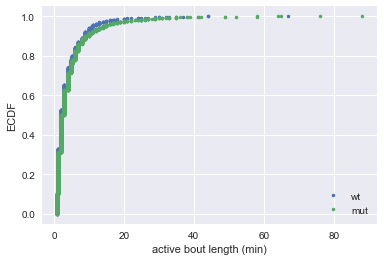

In [108]:
# Plot the ECDFs
dig= plt.plot(x_wt, y_wt, marker='.', linestyle='none')
dig = plt.plot(x_mut, y_mut, marker='.', linestyle='none')

# Make a legend, label axes, and show plot
dig = plt.legend(('wt', 'mut'))
dig = plt.xlabel('active bout length (min)')
dig = plt.ylabel('ECDF')
plt.show()

In [116]:
# boostraping 

# Compute mean active bout length
mean_wt = np.mean(bout_lengths_wt)
mean_mut = np.mean(bout_lengths_mut)

# Draw bootstrap replicates
bs_reps_wt = dcst.draw_bs_reps(bout_lengths_wt, np.mean, size=10000)
bs_reps_mut = dcst.draw_bs_reps(bout_lengths_mut, np.mean, size=10000)

# Compute 95% confidence intervals
conf_int_wt = np.percentile(bs_reps_wt, [2.5, 97.5])
conf_int_mut = np.percentile(bs_reps_mut, [2.5, 97.5])

# Print the results
print("wt:  mean = ", mean_wt, "conf. int. =", conf_int_wt,
"mut: mean =" ,mean_mut, "conf. int. =" ,conf_int_mut,)

('wt:  mean = ', 3.8735557132719247, 'conf. int. =', array([3.63010646, 4.12578886]), 'mut: mean =', 4.430888315517869, 'conf. int. =', array([4.20652304, 4.66892776]))
